In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load kết quả baseline

In [7]:
results_file = "../results/tables/baseline_results.csv"
df_results = pd.read_csv(results_file)

Danh sách các metric

In [8]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
color_palettes = ["Blues", "Reds", "Greens", "Purples"]

# Vẽ từng biểu đồ

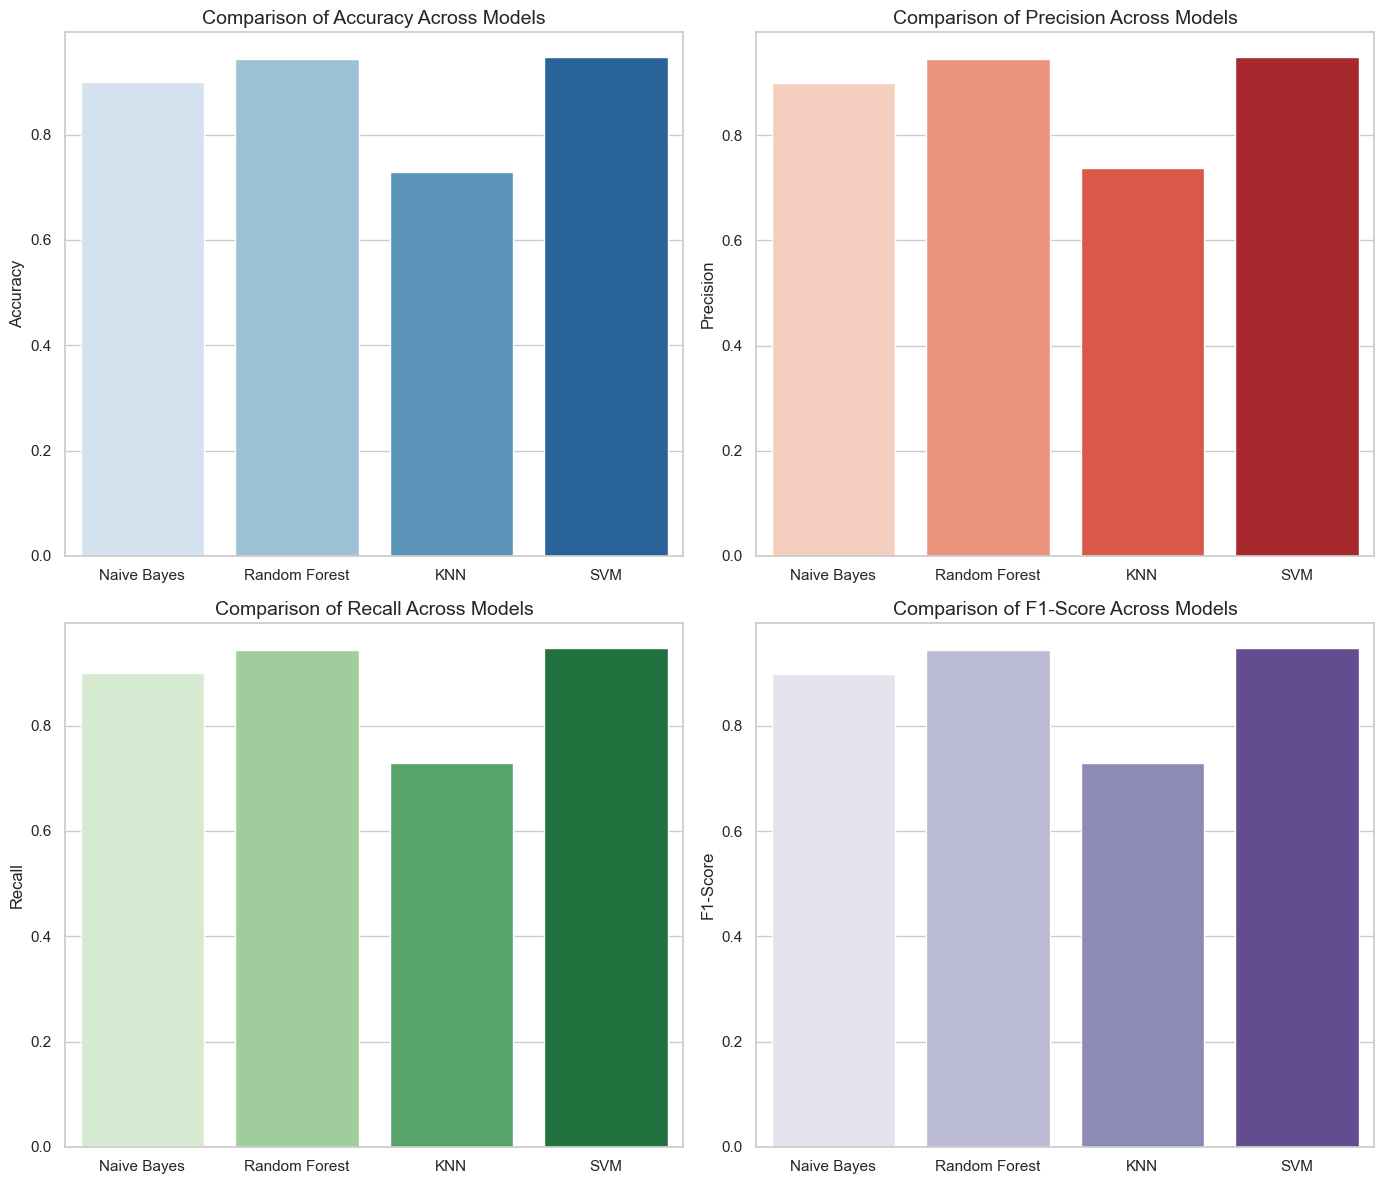

In [9]:
# Thiết lập style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Lấy vị trí subplot
    sns.barplot(x="Model", y=metric, hue="Model", data=df_results, ax=ax, palette=color_palettes[i], legend=False)
    ax.set_title(f"Comparison of {metric} Across Models", fontsize=14)
    ax.set_ylabel(metric)
    ax.set_xlabel("")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()